This code tests what a completely random image passed to the autoencoder would look like.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.ticker as ticker
from pathlib import Path

import torch

from autoencoder_classes import A64_6

In [2]:
device = 'mps'

In [5]:
model_folder = Path('/Users/jarl/2d-discharge-nn/created_models/autoencoder/64x64/A64-6')
model_dir = model_folder/model_folder.stem
model = A64_6().to(device)
model.load_state_dict(torch.load(model_dir))
model.eval()
print(f'loaded model {model_folder.stem}')

loaded model A64-6


In [36]:
def noise2img(inputarray: np.ndarray): 
    fig = plt.figure(dpi=150, layout='constrained')
    grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.0, label_mode='L',
                    share_all=True, cbar_location='right', cbar_mode='single', cbar_size='5%',
                    cbar_pad='5%')

    with torch.no_grad():
        tensor = torch.tensor(inputarray, dtype=torch.float32, device=device)
        rawoutput = model(tensor).cpu().numpy()
        output = rawoutput[:,:,:64,:64]

    cbar_ranges = (0, max(input[0].max(), output[0].max()))
    vmin, vmax = cbar_ranges
    extent = [0, 20, 35, 55]

    for i, ax in enumerate(grid):
        if i <= 4:
            org = ax.imshow(inputarray[0, i], origin='lower', extent=extent,
                            vmin=vmin, vmax=vmax, cmap='magma')
            ax.set_ylabel('z [cm]', fontsize=8)
        else:
            j = i-5
            rec = ax.imshow(output[0, j], origin='lower', extent=extent,
                            vmin=vmin, vmax=vmax, cmap='magma')
            ax.set_ylabel('z [cm]', fontsize=8)
            ax.set_xlabel('r [cm]', fontsize=8)

    grid.cbar_axes[0].colorbar(rec)  # map the colorbar, i guess it doesn't really matter which one

    # set font sizes and tick stuff
    for ax in grid:
        ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))

        ax.yaxis.set_major_locator(ticker.MaxNLocator(3))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(2))
        ax.tick_params(axis='both', labelsize=8)

    plt.close()
    
    return fig

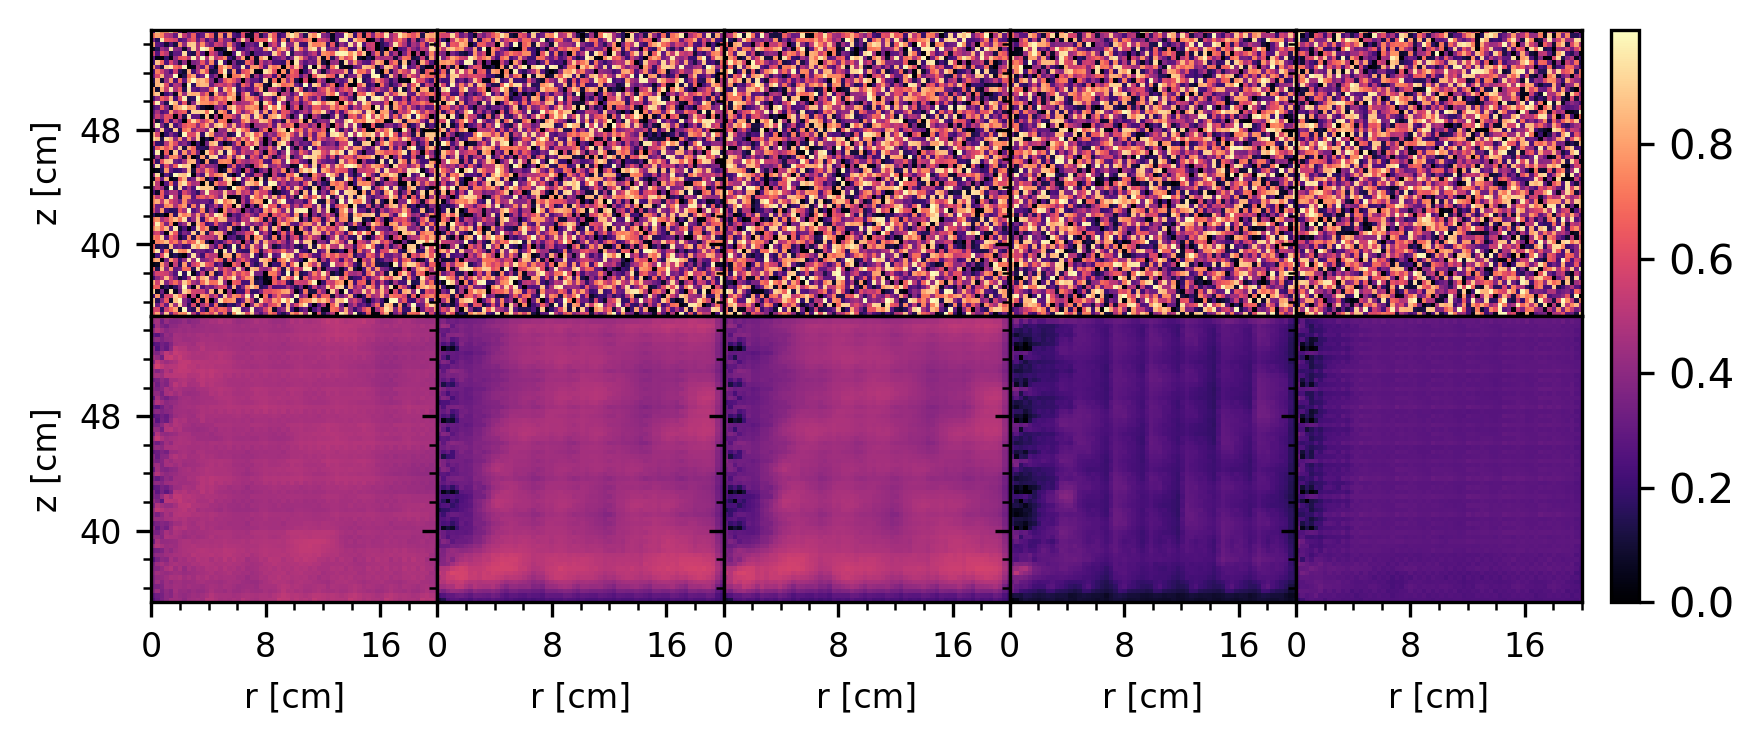

In [30]:
# generate random image
uniform = np.random.rand(1, 5, 64, 64)
noise2img(uniform)

/Users/jarl/miniconda3/envs/torch/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


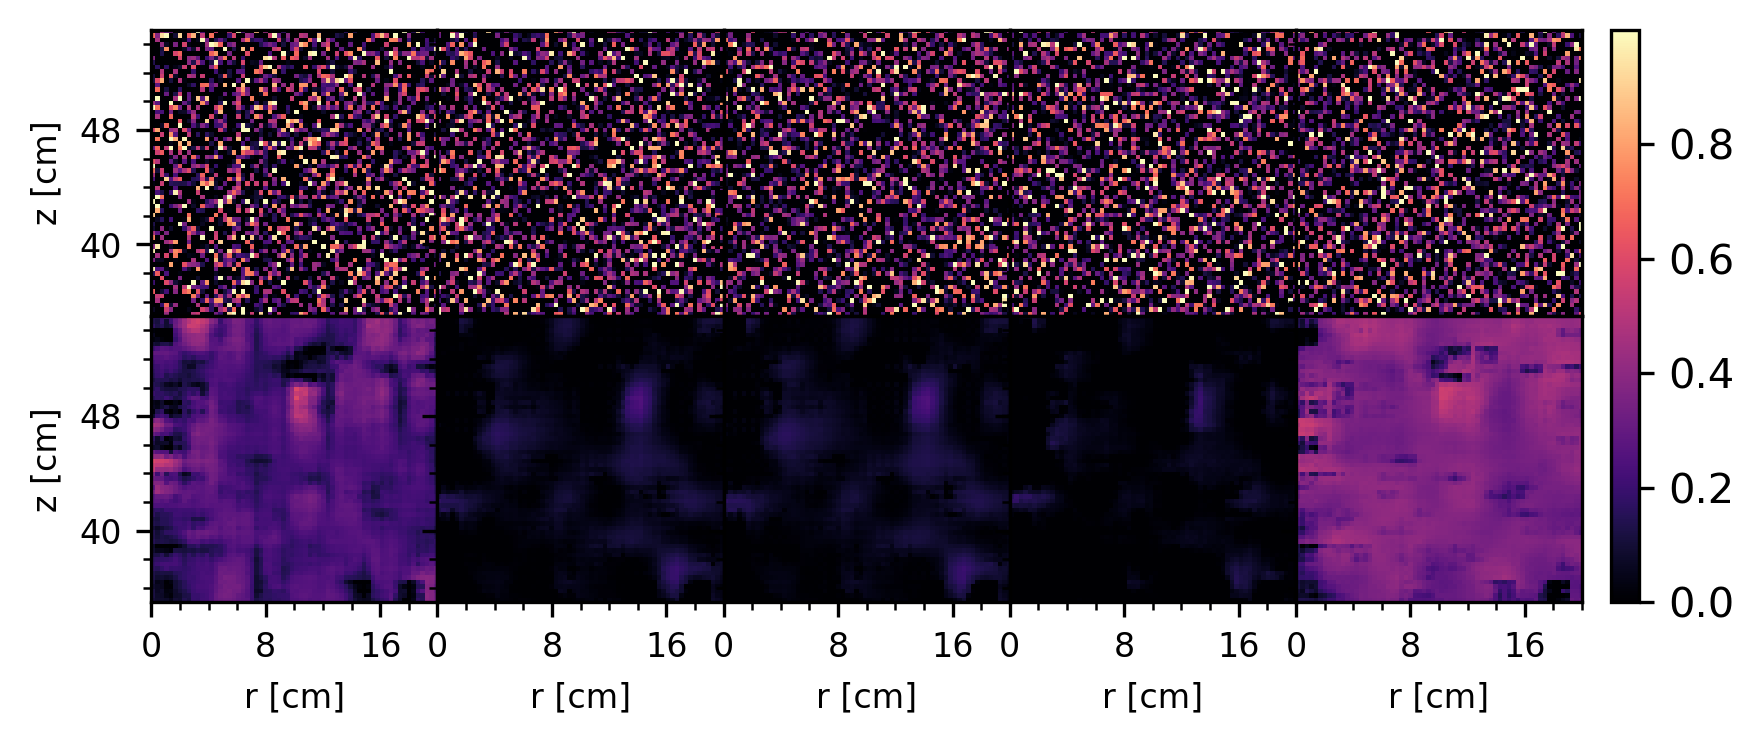

In [33]:
normal = np.random.normal(0, 0.5, [1, 5, 64, 64])
noise2img(normal)

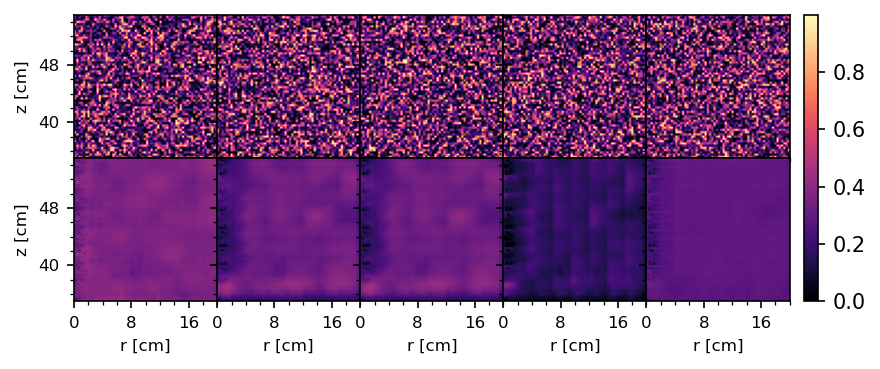

In [41]:
pink = np.random.power(0.5, [1, 5, 64, 64])
noise2img(pink)